Challenge 1 final submission ( Introduction to machine learnng course )

Importing all the required libraries

In [23]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


Dataset exploration

In [2]:
#Load the train dataset
data_path = r"C:\Users\HOME\Downloads\train_set.csv"
data = pd.read_csv(data_path)

In [4]:
print(data.describe())
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows

            RecordId             X2             X3             X4  \
count  246122.000000  243532.000000  243983.000000  246122.000000   
mean   123061.500000      61.929029      30.565596       0.122496   
std     71049.445814      14.398591       9.307204       0.327859   
min         1.000000      16.000000      14.844926       0.000000   
25%     61531.250000      53.444733      24.712623       0.000000   
50%    123061.500000      64.000000      28.455251       0.000000   
75%    184591.750000      72.211074      33.557573       0.000000   
max    246122.000000      89.000000      67.814990       1.000000   

                  X5             X6             X7             X8  \
count  246122.000000  246122.000000  246122.000000  246122.000000   
mean        0.672337       0.646566     169.659252       1.050763   
std         1.230225       0.478037       9.275373       0.635926   
min         0.000000       0.000000     137.200000       0.000000   
25%         0.000000       0.0000

handling Missing values in each column using simple imputer

In [5]:
print(data.isnull().sum())

RecordId       0
X2          2590
X3          2139
X4             0
X5             0
X6             0
X7             0
X8             0
X9             0
X10            0
X11            0
X12            0
X13            0
X14            0
X15            0
X16            0
X17            0
X18            0
X19            0
X20            0
X21            0
X22            0
X23            0
X24            0
X25            0
X26            0
X27            0
X28            0
X29            0
X30            0
X31            0
X32            0
X33            0
X34            0
X35            0
X36            0
X37            0
X38            0
X39            0
X40            0
X41            0
X42            0
X43            0
X44            0
X45            0
X46            0
X47            0
X48            0
X49            0
X50            0
X51            0
X52            0
X53            0
X54            0
X55            0
X56            0
X57            0
X58            0
X59           

In [ ]:
# Make a copy of the data
data_new1 = data.copy()

# Handle missing values by replacing them with the mean
columns_with_missing_values = ['X2', 'X3', 'X75', 'X76', 'X77', 'X78']

imputer = SimpleImputer(strategy="mean")

# Apply the imputer to only the specified columns
data_new1[columns_with_missing_values] = imputer.fit_transform(data_new1[columns_with_missing_values])

Preparing data for training model
used standardScalar

In [8]:
# Split features and target variable
X = data_new1.drop(["RecordId", "Y"], axis=1)
Y = data_new1["Y"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train Test splitting of dataset

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
print("Shapes -> X_train:", X_train.shape, "X_test:", X_test.shape)

Shapes -> X_train: (196897, 77) X_test: (49225, 77)


Initialize and training XGboost model with the best found parameters without feature selection

In [10]:
xgb_model = XGBClassifier(n_estimators=3000,  learning_rate=0.01, random_state=42)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [11]:
# predict and evaluate the model
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.9973590655154901
Confusion Matrix:
 [[49086     0]
 [  130     9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49086
           1       1.00      0.06      0.12       139

    accuracy                           1.00     49225
   macro avg       1.00      0.53      0.56     49225
weighted avg       1.00      1.00      1.00     49225



loading the test dataset

In [12]:
test_data = pd.read_csv(r"C:\Users\HOME\Downloads\test_set.csv")

Same data preparation steps for test dataset as done in train dataset

In [ ]:
# Handle missing values in the test set
data_newt1 = test_data.copy()

data_newt1[columns_with_missing_values] = imputer.fit_transform(data_newt1[columns_with_missing_values])
# Drop the 'RecordId' column from the test data
data_newt2 = data_newt1.drop("RecordId", axis=1)
# Scale the test data
data_newt2_scaled = scaler.transform(data_newt2)

predicting Probabilities for the test set without feature

In [14]:
# Predict probabilities for the test set
prediction_prob = xgb_model.predict_proba(data_newt2_scaled)

# Print or save the prediction probabilities
print("Prediction Probabilities:\n", prediction_prob)

Prediction Probabilities:
 [[9.9974602e-01 2.5398729e-04]
 [9.9989527e-01 1.0470940e-04]
 [9.9999517e-01 4.8277830e-06]
 ...
 [9.9998450e-01 1.5509973e-05]
 [9.9997026e-01 2.9744735e-05]
 [9.9996531e-01 3.4715598e-05]]


Finding features importance

In [17]:
# After training the model
importances = xgb_model.feature_importances_

# Create a DataFrame for easy sorting
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
print(feature_importances_df)

   Feature  Importance
0       X2    0.011118
1       X3    0.010350
2       X4    0.004618
3       X5    0.008677
4       X6    0.014736
5       X7    0.008664
6       X8    0.016262
7       X9    0.008005
8      X10    0.022889
9      X11    0.007328
10     X12    0.009060
11     X13    0.008373
12     X14    0.013951
13     X15    0.015466
14     X16    0.000000
15     X17    0.017649
16     X18    0.016968
17     X19    0.011297
18     X20    0.027962
19     X21    0.009488
20     X22    0.014842
21     X23    0.010353
22     X24    0.009701
23     X25    0.008086
24     X26    0.066844
25     X27    0.006781
26     X28    0.017905
27     X29    0.009434
28     X30    0.011445
29     X31    0.008726
30     X32    0.012111
31     X33    0.009978
32     X34    0.008636
33     X35    0.012231
34     X36    0.010320
35     X37    0.009406
36     X38    0.013555
37     X39    0.017673
38     X40    0.014009
39     X41    0.009799
40     X42    0.010902
41     X43    0.012522
42     X44 

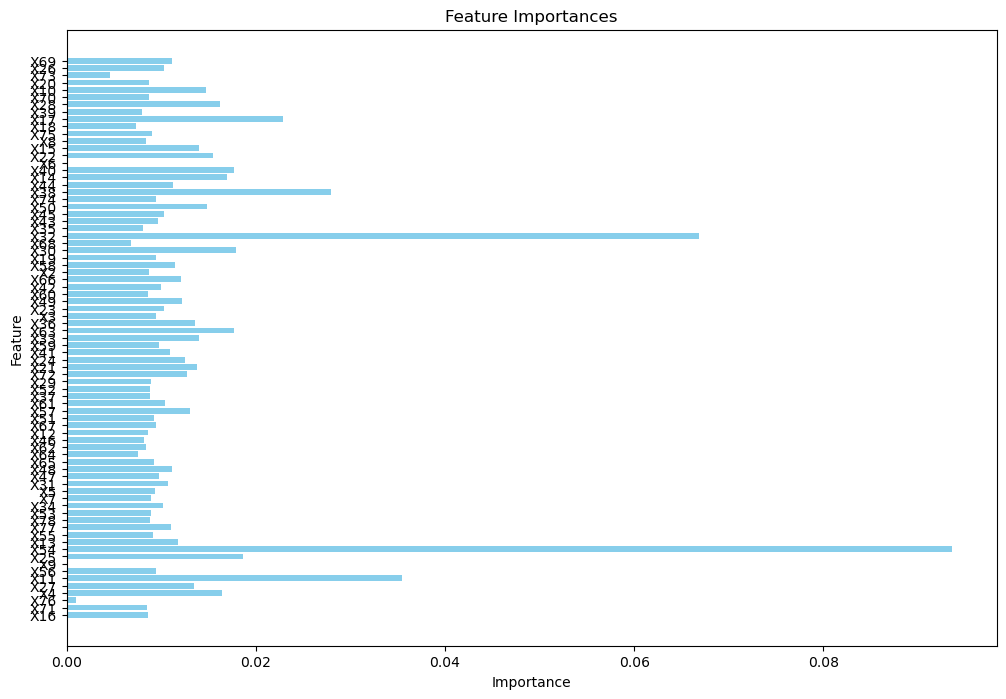

In [18]:
feature_importances_df2 = feature_importances_df.sort_values(by='Importance', ascending=False)
# Plot all feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df2['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Optional: invert y-axis for descending order
plt.show()

In [19]:
# select 40 features with top importance
top_40_features = feature_importances_df.sort_values(by='Importance', ascending=False).head(40)
print("Top 40 Features:\n", top_40_features)

Top 40 Features:
    Feature  Importance
67     X69    0.093608
24     X26    0.066844
71     X73    0.035473
18     X20    0.027962
8      X10    0.022889
68     X70    0.018612
26     X28    0.017905
37     X39    0.017673
15     X17    0.017649
16     X18    0.016968
73     X75    0.016461
6       X8    0.016262
13     X15    0.015466
20     X22    0.014842
4       X6    0.014736
38     X40    0.014009
12     X14    0.013951
42     X44    0.013824
36     X38    0.013555
72     X74    0.013423
48     X50    0.012999
43     X45    0.012701
41     X43    0.012522
33     X35    0.012231
30     X32    0.012111
66     X68    0.011823
28     X30    0.011445
17     X19    0.011297
56     X58    0.011176
0       X2    0.011118
64     X66    0.010992
40     X42    0.010902
58     X60    0.010701
47     X49    0.010355
21     X23    0.010353
1       X3    0.010350
34     X36    0.010320
61     X63    0.010192
31     X33    0.009978
57     X59    0.009814


Filtering training and test dataset by using only the top 40 features

In [20]:
# Filter the training and test data to include only the top 40 features
X_train_top40 = X_train[:, top_40_features.index]
X_test_top40 = X_test[:, top_40_features.index]

Training xgboost model on only top 40 features

In [ ]:
xgb_model_top40 = XGBClassifier(
    n_estimators=3000,           
    learning_rate=0.005,         
    max_depth=6,                 
    min_child_weight=3,          
    subsample=0.85,              
    colsample_bytree=0.85,       
    gamma=0.1,                   
    reg_alpha=0.2,               
    reg_lambda=1.1,              
    random_state=42
)

xgb_model_top40.fit(X_train_top40, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [27]:
# Predict and evaluate using the reduced feature set
y_pred_top40 = xgb_model_top40.predict(X_test_top40)
print("Accuracy (Top 40 Features):", accuracy_score(Y_test, y_pred_top40))
print("Confusion Matrix (Top 40 Features):\n", confusion_matrix(Y_test, y_pred_top40))
print("Classification Report (Top 40 Features):\n", classification_report(Y_test, y_pred_top40))


# using top 40 features for the test data predictions
data_newt2_top40 = data_newt2_scaled[:, top_40_features.index]
prediction_prob_top40 = xgb_model_top40.predict_proba(data_newt2_top40)

#printing ROC score
y_pred_proba = xgb_model_top40.predict_proba(X_test_top40)[:, 1] 
print("AUC:", roc_auc_score(Y_test, y_pred_proba))

Accuracy (Top 40 Features): 0.9973590655154901
Confusion Matrix (Top 40 Features):
 [[49085     1]
 [  129    10]]
Classification Report (Top 40 Features):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49086
           1       0.91      0.07      0.13       139

    accuracy                           1.00     49225
   macro avg       0.95      0.54      0.57     49225
weighted avg       1.00      1.00      1.00     49225

AUC: 0.9640966361490932


In [28]:
# Prepare submission file
submission = pd.read_csv(r'C:\Users\HOME\Downloads\sample_submission (2).csv')
submission['Y'] = prediction_prob_top40[:, 1]  # Probabilities for the positive class
submission.to_csv('finalSubmission.csv', index=False)
print("Submission filecreated successfully!")

Submission filecreated successfully!
